# Problem Description
* 2 Gaussian Clouds
* Both have the same covariance, but different means
* Multivariate Gaussian PDF

$
p(x) = \frac{1}{\sqrt{(2\pi)^D\lvert \Sigma \rvert}}\exp({-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)})
$

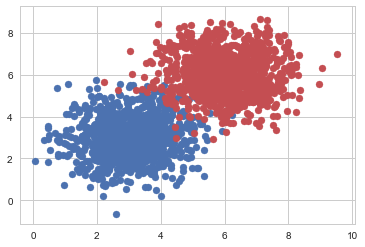

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(1000, 2) + 3
X2 = np.random.randn(1000, 2) + 6
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X2[:, 0], X2[:, 1], c= 'r')

# Bayes' Rule

$$
p(y\mid x) = \frac{p(x\mid y)p(y)}{p(x)} \\
$$

# Likelihood
$$
p(y=1\mid x) = \frac{p(x\mid y=1)p(y=1)}{p(x)} \\
p(y=0\mid x) = \frac{p(x\mid y=0)p(y=0)}{p(x)}
$$

$P(X\mid Y)$ is Gaussian distributed. <br>
We can find mean and variance by applying <strong>Maximum Likelihood Estimation (MLE)</strong>

# Put it into the logistic regression framework

Manipulate Bayes' Rule
$$
p(y=1\mid x) = \frac{p(x\mid y=1)p(y=1)}{p(x)} = \frac{p(x\mid y=1)p(y=1)}{p(x\mid y=1)p(y=1) + p(x\mid y=0)p(y=0)}
$$
<br><br>
Divide numerator and denominator by $p(x\mid y=1)p(y=1)$
<br><br>
$$
p(y=1\mid x) = \frac{1}{1 + \frac{p(x\mid y=0)p(y=0)}{p(x\mid y=1)p(y=1)}}
$$
<br><br>
Looks a lot like a logistic function. <br>
Let $p(y=1) = 1-\alpha$, $p(y=0)=\alpha$.
<br><br>
$$
\ln{\frac{p(x\mid y=0)p(y=0)}{p(x\mid y=1)p(y=1)}} \\
= \ln{p(x\mid y=0)} + \ln{\alpha} - \ln{p(x \mid y=1)}-\ln{(1-\alpha)}
$$ 
<br><br>
Plug Gaussian PDF into likelihoods.
<br><br>
$$
= \ln{\frac{1}{\sqrt{(2\pi)^D\lvert \Sigma \rvert}}\exp\Big({-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)}\Big)} - \ln{\frac{1}{\sqrt{(2\pi)^D\lvert \Sigma \rvert}}\exp\Big({-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)}\Big)} + \ln{\frac{\alpha}{1-\alpha}}
$$
<br><br>
$1/\sqrt{(...)}$ terms cancel out.
<br><br>
$$
= -\frac{1}{2}\big(x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_0 - {\mu_0}^T\Sigma^{-1}x+{\mu_0}^T\Sigma^{-1}\mu_0 \big)+\frac{1}{2}\big(x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_1 - {\mu_1}^T\Sigma^{-1}x+{\mu_1}^T\Sigma^{-1}\mu_1 \big)+\ln{\frac{\alpha}{1-\alpha}}
$$
<br><br>
Quadratic term cancels out because the covariance matrixes are the same (Linear Discriminant Analysis's Assumption).
<br><br>
$x^T\Sigma^{-1}\mu$ is equal to $\mu^T\Sigma^{-1}x$ because covariance matrix is symmetric and then inverse of symmetric matrix is also symmetric. (Try prove yourself.)
<br><br>
$$
 = \mu_0^T\Sigma^{-1}x - {\mu_1}^T\Sigma^{-1}x - \frac{1}{2}{\mu_0}^T\Sigma^{-1}\mu_0 + \frac{1}{2}{\mu_1}^T\Sigma^{-1}\mu_1 + \ln{\frac{\alpha}{1-\alpha}} \\
 = ({\mu_0}^T-{\mu_1}^T)\Sigma^{-1}x - \frac{1}{2}{\mu_0}^T\Sigma^{-1}\mu_0 + \frac{1}{2}{\mu_1}^T\Sigma^{-1}\mu_1 + \ln{\frac{\alpha}{1-\alpha}} \\
 = -(w^Tx + b)
$$

# Finally

$$
w^T = ({\mu_1}^T - {\mu_0}^T)\Sigma^{-1} \\
b = \frac{1}{2}{\mu_0}^T\Sigma^{-1}\mu_0 + \frac{1}{2}{\mu_1}^T\Sigma^{-1}\mu_1 + \ln{\frac{\alpha}{1-\alpha}}
$$

###### If covariance is a diagonal matrix (Naive Bayes), what happens to the equations above?
###### If we have different covariances (Quadratic Discriminant Analysis) what happens?
  * The quatratic terms no longer cancel out.
  
###### The solution above is optimal provided that the assumptions we made about the distributions are true.
###### Generally we use gradient descent which is more generally applicable.